**<h1>CPSC 585-01 Spring 2023 Introductory Project, Gordon Huynh</h1>**
 <li>This introductory project focuses on building skills with Python and some of the libraries and tools needed to work with neural network models. </li>



In [ ]:
# importing the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.python.keras.layers import Input, Dense, Dropout


**<h1>Importing the ScikitLearn Dataset</h1>**
<li>The <a href="https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset">Optical recognition of handwritten digits dataset</a>, included with the scikit-learn library consists of 1797 8✕8 grayscale images of hand-written digits sorted into classes 0 to 9, in which the values of the arrays vary from 0 to 16.</li>

In [ ]:
# importing the handwritten digits dataset
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

**<h1>Verifying the Dataset Attributes</h1>**
<li>We check the shape of the data/images below with:

```
digits.data.shape
```

```
digits.images.shape
```


</li>

In [ ]:
# loading the digits from data set
digits = load_digits()

In [ ]:
# checking number of instances/attributes
print(digits.data.shape)

(1797, 64)


In [ ]:
#shape of digits data, dataset has 1791 images in total, and each of these are in an 8x8 array of grayscale pixels (64 total pixels)
print("Digits Data Shape:", digits.images.shape)

Digits Data Shape: (1797, 8, 8)


**<h1>Visualizing the Dataset Arrays</h1>**
<li>A test print of the first array index yields the aforementioned 8✕8 array of values ranging from 0 to 16. </li>

> <li>Plotting the image yields a grayscale 8✕8 graph in which we can see the array values functioning as a spectrum of grayscale intensity, with a value of "0" representing a completely white cell, and a "16" representing a completely black cell. </li><br>




In [ ]:
#test print an instance of digits array, values of the array range from 0 to 16
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


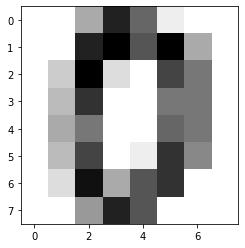

In [ ]:
#test print the image of the above instance
plt.imshow(digits.images[0],cmap='binary')
plt.show()

<Figure size 432x288 with 0 Axes>

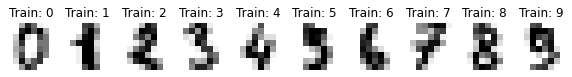

In [ ]:
# visualize digits
plt.figure()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Train: %i" % label)


**<h1>Task 1.</h1>**


**<h1>Transforming the Dataset</h1>**
<li>The input layer of the neural network requires a 1-dimensional array as input.</li>

> <li>Currently, the data from ScikitLearn Dataset is by default in 2-dimensional arrays (8, 8). Thus, we flatten the images from 2-dimensional arrays (8, 8) into 1-dimensional arrays of shape (64, ), where (n_samples, n_features) such that n_samples is the number of images and n_features is the total number of pixels in each image.</li>



In [ ]:
# flatten images 
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

**<h1>Splitting the Dataset</h1>**
<li>The dataset is split in two, half of which will be used to train the network, and the other half will be used to test the network.</li><br>

In [ ]:
# split dataset into 50% training and 50% testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data, digits.target, test_size = 0.5)

In [ ]:
# verify test/train data split correctly
print("Train Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)
print("Target Train Data Shape:", Y_train.shape)
print("Target Test Data Shape:", Y_test.shape)

Train Data Shape: (898, 64)
Test Data Shape: (899, 64)
Target Train Data Shape: (898,)
Target Test Data Shape: (899,)


In [ ]:
# normalizing the data to between 0 and 1 to help with the training

X_train /= 255
X_test /= 255

# print input shape ready for training 
print("Train Matrix Shape", X_train.shape) 
print("Test Matrix Shape", X_test.shape)

Train Matrix Shape (898, 64)
Test Matrix Shape (899, 64)


**<h1>One Hot-Encoding Output</h1>**
<li>Currently, the output neurons can only give an output in the range of 0 to 1. Thus, we convert discrete output values to categorical values so that output values can be represented as a vector of zero and one with the length equal to the number of classes (this case being 10, as there are 10 different digits to recognize, 0, 1, 2, 3, 4, ... 9.)</li>

In [ ]:
# hot encoding training with keras np_utils
n_classes = 10

print("Shape before one-hot encoding: ", Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, n_classes) 
Y_test = np_utils.to_categorical(Y_test, n_classes) 
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (898,)
Shape after one-hot encoding:  (898, 10)


**<h1>Defining Neural Network Model Architecture</h1>**
<li><code>tf.keras.Sequential</code> groups a linear stack of layers into a <code>tf.keras.Model</code>.</li><br>

<li><code>tf.keras.layers.Dense</code> is a regular densely-connected Neural Network Layer.</li><br>

<li><code>tf.keras.layers.Dropout</code>: applies Dropout to the input, randomly setting input units to 0 at a specified frequency (in this case 0.2) during each training step in order to avoid overfitting.</li><br>


**<h1>Function Call Parameters</h1>**

<li>Listed below are the parameters for functions in which we add layers to the model.</li>

```
model.add(tf.keras.layers.Dense(units, input_shape, name))
```


<li><code>units</code>: A positive integer, dimensionality of the output 
space. <code>64</code> is specified to be the dimensionality of the layer in the section below, giving us a layer of 64 neurons. .</li><br>

<li><code>input_shape</code>: Specifies the input shape, in this case being <code>X_train.shape[1]</code> in the section below.</li><br>

<li><code>name</code>: Name of the layer, in this case being <code>name="input_layer"</code> in the section below.</li><br>


```
model.add(tf.keras.layers.Activation(activation)
```

<li><code>activation</code>: Activation function to use. The activations used in this project are listed as follows.</li><br>

<li><code>relu</code>: Computes the rectified linear unit: <code>max(features, 0)</code>.</li><br>
  
<li><code>softmax</code>: Computes softmax activations, used for multi-class predictions. The sum of all outputs generated by softmax is 1. This function performs the equivalent of <code>softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis, keepdims=True)</code>.</li>


```
model.add(tf.keras.layers.Dropout(rate))
```
<li><code>rate</code>: Value of type float between 0 and 1, the value represents the fraction of the input units to drop.</li><br>

In [ ]:
# define model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), name="input_layer"))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, name="hidden_layer"))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, name="output_layer"))
model.add(tf.keras.layers.Activation('softmax'))

**<h1>Model Summary and Training</h1>**

<li>As we can see, the model is defined having an input layer of 64 neurons, a hidden layer of 64 neurons, and an output layer of having 10 neurons.</li><br>

In [ ]:
# print model attributes to check for layers/parameters
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 64)                4160      
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 hidden_layer (Dense)        (None, 64)                4160      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 output_layer (Dense)        (None, 10)                6

**<h1>Compiling the Model</h1>**

<li><code>model.compile()</code> configures the model for training.</li><br>

<li><code>optimizer</code>: Built-in optimizer classes.</li>

> <li><code>tf.keras.optimizers.Adam</code> implements the Adam algorithm, a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.</li>

<li><code>loss</code>: Built-in optimizer loss functions.

> <li><code>tf.keras.losses.CategoricalCrossentropy</code> computes the crossentropy loss between the labels and predictions.</li>

<li><code>metrics</code>: List of metrics to be evaluated by the model during training and testing.

> <li><code>tf.keras.metrics.Accuracy</code> calculates how often predictions match labels.</li>

In [ ]:
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**<h1>Training the Model</h1>**
<li>Listed below are the parameters for the function in which we train model.</li>

```
model.fit(x, y, epochs, batch_size, validation_data)
```

<li><code>x</code>: The input data; in this case, <code>X_train</code> is the input data below.</li><br>

<li><code>y</code>: The target data; in this case, <code>Y_train</code> is the target data below.</li><br>

<li><code>epochs</code>: The number of epochs (an iteration over the entire x and y data provided) to train the model, in this case being <code> 400</code> below.</li><br>

<li><code>batch_size</code>: The number of samples per gradient update, in this case, being <code>64</code> below.</li><br>

<li><code>validation_data</code>: Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.</li><br>


  

In [ ]:
# train model
history = model.fit(X_train, Y_train, epochs=400, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/400
15/15 [==============================] - 2s 27ms/step - loss: 2.2981 - accuracy: 0.1314 - val_loss: 2.2894 - val_accuracy: 0.1935
Epoch 2/400
15/15 [==============================] - 0s 7ms/step - loss: 2.2849 - accuracy: 0.2004 - val_loss: 2.2752 - val_accuracy: 0.2269
Epoch 3/400
15/15 [==============================] - 0s 11ms/step - loss: 2.2674 - accuracy: 0.2962 - val_loss: 2.2544 - val_accuracy: 0.4071
Epoch 4/400
15/15 [==============================] - 0s 7ms/step - loss: 2.2424 - accuracy: 0.3664 - val_loss: 2.2261 - val_accuracy: 0.3882
Epoch 5/400
15/15 [==============================] - 0s 7ms/step - loss: 2.2082 - accuracy: 0.4154 - val_loss: 2.1869 - val_accuracy: 0.4549
Epoch 6/400
15/15 [==============================] - 0s 7ms/step - loss: 2.1675 - accuracy: 0.4287 - val_loss: 2.1378 - val_accuracy: 0.5751
Epoch 7/400
15/15 [==============================] - 0s 10ms/step - loss: 2.1129 - accuracy: 0.5267 - val_loss: 2.0683 - val_accuracy: 0.6363
Epoch 8/40

**<h1>Evaluating the Model</h1>**

<li>Below, we evaluate the model on the training and testing sets, as well as calculate the generalization gap.</li>

> <li>The generalization gap is the difference between a model's performance on training data and its performance on unseen data drawn from the same distribution.</li>





In [ ]:
# evaluate model on training set
train_loss, train_acc = model.evaluate(X_train, Y_train)
print("train_loss:", train_loss)
print("train_acc:", train_acc)

29/29 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
train_loss: 0.006940165068954229
train_acc: 1.0


In [ ]:
# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("train_loss:", test_loss)
print("train_acc:", test_acc)

29/29 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9600
train_loss: 0.19132837653160095
train_acc: 0.9599555134773254


In [ ]:
# calculate generalization gap
generalization_gap = train_loss - test_loss
print("Generalization gap:", generalization_gap)

Generalization gap: -0.18438821146264672


**<h1>Task 2.</h1>**


**<h1>Dumping the Weights</h1>**

<li>Below, we dump the weights by layer with a <code>for</code> loop iterating through each layer in the model. The following section returns the weights of all the layers in the model.</li>

In [ ]:
#dump the weights
weights = model.get_weights()

for layer in model.layers:
  print(layer.get_config(), layer.get_weights())



{'name': 'input_layer', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 64), 'units': 64, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 0.18569665, -0.13193066,  0.03065346, ...,  0.17088158,
         0.02900732,  0.07129903],
       [-0.12495903,  0.4021446 , -1.173175  , ..., -1.1209896 ,
        -1.2544267 , -0.05443404],
       [ 0.02680123, -0.05601811, -0.13567044, ..., -0.4735934 ,
        -0.29746637,  0.20889318],
       ...,
       [ 0.27661455, -0.11284597,  0.0430582 , ..., -0.24261628,
         0.04455539,  0.4607982 ],
       [-0.28287137,  0.63326216, -0.3496443 , ..., -0.18219794,
        -0.15444973,  0.2128075 ],
       [-0.5993885 ,  0.8601746 ,  0.4333951 , ..., -1.08540

**<h1>Retrieving Specific Weights</h1>**

<li>The layers of the model are stored in a list of length <code>8</code>,   </li>

In [ ]:
len(model.layers)

8

<li>For reference, again, this is the code to define the model. We can see which indexes of the list we need to retrieve the weights are from, those being the layers in which the input, hidden, and output layers are defined, being indexes 1, 4, and 7 respectively.</li>

```
# define model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), name="input_layer"))  # layer 1
model.add(tf.keras.layers.Activation('relu'))  # layer 2
model.add(tf.keras.layers.Dropout(0.2))  # layer 3
model.add(tf.keras.layers.Dense(64, name="hidden_layer"))  # layer 4
model.add(tf.keras.layers.Activation('relu'))   # layer 5
model.add(tf.keras.layers.Dropout(0.2))    # layer 6
model.add(tf.keras.layers.Dense(10, name="output_layer"))    # layer 7
model.add(tf.keras.layers.Activation('softmax'))    # layer 8
```

<li>Thus, we can get the weights and biases of each layer, as shown in the following section. Note, the weights of each layer are stored in the first index, while the biases of each layer are stored in the index immediately following it.</li>

In [ ]:
# [0]=weights [1]=biases
input_layer_weights = model.layers[0].get_weights()[0]
input_layer_biases  = model.layers[0].get_weights()[1]
hidden_layer_weights = model.layers[3].get_weights()[0]
hidden_layer_biases  = model.layers[3].get_weights()[1]
output_layer_weights = model.layers[6].get_weights()[0]
output_layer_biases  = model.layers[6].get_weights()[1]

**<h1>Defining Functions Necessary for Forward Propogation</h1>**

<li>Below, we define functions necessary for forward propogation. These are all given in the Programming Exercises problems 1 to 6, and 8.</li>





In [ ]:
# define sigmoid function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# initialize weights
def init_weights(n_inputs, n_hidden, n_output):
  W0 = np.random.randn(n_inputs, n_hidden)
  W1 = np.random.randn(n_hidden, n_hidden)
  W2 = np.random.randn(n_hidden, n_output)
  return W0, W1, W2

# feedforward function
def feedforward(x, W0, W1, W2):
  z0 = np.dot(x, W0)
  a0 = sigmoid(z0)
  z1 = np.dot(a0, W1)
  a1 = sigmoid(z1)
  z2 = np.dot(a1, W2)
  a2 = sigmoid(z2)
  return z0, a0, z1, a1, z2, a2

# predict function
def predict(x, W0, W1, W2):
  _,_, _, _, _, a2 = feedforward(x, W0, W1, W2)
  return a2

# backpropogation function
def backprop(X_training, Y_training, W0, W1, W2, learning_rate):
  m = len(X_training)
  for x, y in zip(X_training, Y_training):
    z0, a0, z1, a1, z2, a2 = feedforward(x, W0, W1, W2)
    dz2 = a2 - y
    dw2 = np.dot(a1.T, dz2) / m
    dz1 = np.dot(dz2, W2.T) * sigmoid(z1) * (1 - sigmoid(z1))
    dw1 = np.dot(a0.T, dz1) / m
    dz0 = np.dot(dz1, W1.T) * sigmoid(z0) * (1 - sigmoid(z0))
    dw0 = np.dot(x.T, dz0) / m
    W0 -= learning_rate * dw0
    W1 -= learning_rate * dw1
    W2 -= learning_rate * dw2
  return W0, W1, W2

#loss function
def loss(Y_pred, Y):
  return np.mean((Y_pred - Y) ** 2)

#main function
def main(X_training, Y_training, n_inputs, n_hidden, n_output, n_epochs,
learning_rate):
  W0, W1, W2 = init_weights(n_inputs, n_hidden, n_output)
  for epoch in range(n_epochs):
    W0, W1, W2 = backprop(X_training, Y_training, W0, W1, W2, learning_rate)
    Y_pred = predict(X_training, W0, W1, W2)
    train_loss = loss(Y_pred, Y_training)
    print(epoch, train_loss)
  return W0, W1, W2, train_loss

# define the linear function
def linear_function(W, A_prev):
  Z = np.dot(W.T, A_prev)
  return Z

# define the non-linear function
def non_linear_function(Z, activation_function):
  A = activation_function(Z)
  return A

# define the forward propagation function
def forward_propagation(W, A_prev, activation_function):
  Z = linear_function(W, A_prev)
  A = non_linear_function(Z, activation_function)
  return A

# relu nonlinear activation function
def relu(z):
  return np.maximum(0, z)

# softmax nonlinear activation function
def softmax(z):
  exp_z = np.exp(z)
  return exp_z / exp_z.sum()


**<h1>Defining NumPy Network (Nonfunctional)</h1>**

<li>Below, we attempt to create the neural network through NumPy.</li>


In [ ]:
# set training data
x_training = X_train
y_training = Y_train

# Initialize network
n_inputs = 64
n_hidden = 64
n_output = 10

W0, W1, W2 = init_weights(n_inputs, n_hidden, n_output)

# Train the network
W0, W1, W2 = main(x_training, y_training, n_inputs, n_hidden, n_output, n_epochs=400, learning_rate=0.2)

# Test the network
x_test = np.random.randn(1, 10)
y_pred = predict(x_test, W0, W1, W2)
print(y_pred)

**<h1>Execute Forward Propogation (Nonfunctional)</h1>**

<li>Below, we attempt to execute forward propogation of the NumPy network.</li>


In [ ]:
# Example usage:
W = np.array(input_layer_weights)
A_prev = np.array([0])
b = np.array(input_layer_biases)

# Append bias vector to W
W = np.append(W, b.reshape(-1,1), axis=1)

# Append bias term to A_prev
A_prev = np.append(A_prev, hidden_layer_biases)

# Perform forward propagation
A = forward_propagation(W, A_prev, relu)
A = forward_propagation(W, A_prev, relu)
A = forward_propagation(W, A_prev, softmax)
# Output: A = sigmoid(W.T * A_prev)

**<h1>Task 3.</h1>**


**<h1>Verify Accuracy</h1>**

<li>Below, we plot images for several results in each class.</li>


> <li>The chart below displays the model accuracy and loss over time while training.</li>




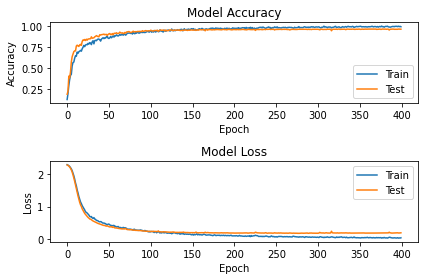

In [ ]:
# Plotting the metrics for model

plt.subplot(2,1,1)
plt.title('Model Accuracy') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy') 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) 

plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2) 
plt.title('Model Loss') 
plt.xlabel('Epoch')
plt.ylabel('Loss') 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 

plt.legend(['Train', 'Test'], loc='upper right') 
plt.tight_layout()

plt.show()

<br><li>For reference, this is the training loss and training accuracy of the model.</li>


In [ ]:
# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("train_loss:", test_loss)
print("train_acc:", test_acc)

29/29 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9600
train_loss: 0.19132837653160095
train_acc: 0.9599555134773254


**<h1>Model Predictions</h1>**

<li>Below, we generate predictions with our model on the test split of the dataset.</li>

> <li>We append predictions that match the expected value in the <code>correct_indices</code> list, append predictions that do not match the expected value in the <code>incorrect_indices</code> list.</li>


In [ ]:
# get predictions with model on test set
predictions = (model.predict(X_test) > 0.1).astype("float32")

correct_indices = np.nonzero(predictions == Y_test)[0] 
incorrect_indices = np.nonzero(predictions != Y_test)[0]

print(len(correct_indices)," classified correctly") 
print(len(incorrect_indices)," classified incorrectly")


29/29 [==============================] - 0s 2ms/step
8882  classified correctly
108  classified incorrectly


**<h1>Visualizing Predictions</h1>**

<li>Below, we output the first 25 indexes of the <code>correct_indices</code> list, outputting both the predicted value and the truth value.</li>

> <li>We can see below that a predicted value of <code>[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]</code> corresponds to the outputted chart of a figure resembling an <code>6</code>, and that a predicted value of <code>[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]</code> corresponds to the outputted chart of a figure resembling an <code>7</code>.</li>

Predicted: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Predicted: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Pred

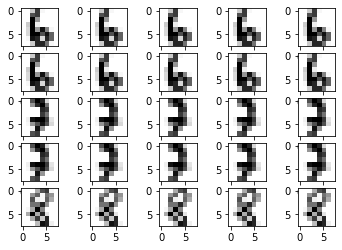

In [ ]:
# plot correct predicted values and graphs
for i, correct in enumerate(correct_indices[:25]): 
  img = X_test[correct].reshape(8,8)
  plt.subplot(5,5,i+1) 
  plt.imshow(img, cmap="Greys")
  print("Predicted: {}, Truth: {}".format(predictions[correct],Y_test[correct]))


<li>Below, we examine the first 25 indexes of the <code>incorrect_indices</code> list, outputting both the predicted value and the truth value. As we can see, the model failed to categorize the figures as they are somewhat ambiguous.</li>

> <li>Take for example the second figure, we can see that the model predicted a value of <code>[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]</code> categorizing the somewhat ambiguous figure as both a <code>8</code>, and a <code>9</code>, when in actuality the expected value was <code>[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]</code>, a figure resembling the digit <code>4</code>.</li>

Predicted [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.], Truth: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Predicted [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.], Truth: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Predicted [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.], Truth: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Predicted [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted [0. 0. 1. 0. 0. 0. 0. 0. 1. 0.], Truth: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Predicted [0. 1. 0. 0. 1. 0. 0. 0. 0. 0.], Truth: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Predicted [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.], Truth: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Predicted [0. 1. 0. 0. 1. 0. 0. 1. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Predicted [0. 1. 0. 0. 1. 0. 0. 1. 0. 0.], Truth: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Predicted [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.], Truth: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Predicted [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.], Truth: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted [0. 0.

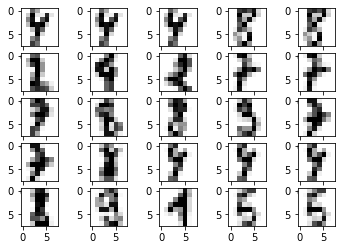

In [ ]:
# plot incorrect predicted values and graphs
for i, incorrect in enumerate(incorrect_indices[:25]):
  img = X_test[incorrect].reshape(8,8)
  plt.subplot(5,5,i+1) 
  plt.imshow(img, cmap="Greys")
  print( "Predicted {}, Truth: {}".format(predictions[incorrect], Y_test[incorrect]))

**<h1>Conclusions</h1>**

<li>We can see that model fitted fairly well and was able to generalize to the test data split.</li>


><li>From the predictions examined, the model was able to reasonably recognize digits outside of some fairly ambiguous instances where even a human may not be able to distinguish the digit.</li>
